### **MARG Machine Listening Tutorial**


# **2. Music Genre Classification** 



두 번째 tutorial 실습 주제는 음악 장르 분류 모델 설계입니다. 학습 데이터셋에는 jazz, classical, country, disco 등 10가지 장르에 해당하는 30초 길이의 음원이 있습니다. 이전 실습의 내용과 동일하게 데이터 로드부터 네트워크 성능 검증까지 진행합니다.

###중요!! 실행에 앞서 상단 메뉴의 '런타임' 메뉴를 누르고, '런타임 유형 변경' 한 다음 '노트북 세팅'이 'GPU'로 설정되어 있는지 확인해 주세요.


#학습 데이터 준비

먼저, 아래 링크에 있는 데이터를 구글 드라이브에 추가해주세요. 

# GTZAN - audio
: https://drive.google.com/file/d/1MVa2cmIdhm2vanrJwdWQQPR9qJDf0iSp/view?usp=sharing



# GTZAN - npy
: https://drive.google.com/file/d/1oSTpRRa-ZSaaJjdv9s27AwC2Zo7_qEou/view?usp=sharing


# GTZAN -preprocessed feature
: https://drive.google.com/file/d/1NJ9PlTm8ab6QoN1SjDarW5Mud4Zsp0IA/view?usp=sharing




# 구글 드라이브 연동
학습 데이터를 가져오기 위해 구글 드라이브와 연동합니다.

링크를 클릭한 후 인증 코드를 복사하여 입력합니다.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


좌측의 파일 탭에서 새로 고침을 누르면 drive 폴더가 연동된 것을 확인할 수 있습니다.


위에서 구글 드라이브에 추가한 학습 데이터를 tutorial2 폴더에 압축 해제합니다.

압축 해제하기 위해 학습 데이터의 경로가 필요합니다.

각 파일을 찾아 오른쪽 클릭 후 경로복사를 눌러서 하단의 코드에 순서대로 입력해주세요.

In [3]:
# !mkdir -p tutorial2
# !unzip -q "여기에 gtzan_npy.zip의 경로를 복사해주세요" -d tutorial2
# !unzip -q "여기에 gtzan_wav.zip의 경로를 복사해주세요" -d tutorial2
# !unzip -q "여기에 preprocessed_features.zip의 경로를 복사해주세요" -d tutorial2

!mkdir -p tutorial2
!unzip -n -q "/content/drive/My Drive/gtzan_npy.zip" -d tutorial2
!unzip -n -q "/content/drive/My Drive/gtzan_wav.zip" -d tutorial2
!unzip -n -q "/content/drive/My Drive/preprocessed_features.zip" -d tutorial2

# 학습 데이터 둘러보기


압축 해제가 완료되면, 왼쪽 탭에서 우리가 사용할 오디오 데이터를 확인할 수 있습니다.

tutorial2/wav 폴더 아래에 각 장르 별로 폴더가 나뉘었으며 그 안에 30초 길이의 음원이 100개씩 저장되어 있습니다.

---

이제, 파일 중 하나를 불러와 살펴보도록 하겠습니다.
우리는 오디오 파일을 다루기 위해, **librosa** 라는 이름의 python library를 사용합니다. 


audio_path 변수에 불러올 파일의 위치를 지정합니다.
오디오를 읽고 확인해볼 수 있습니다.

audio_path에 다른 파일의 위치를 입력하여 다른 음원들도 들어볼 수 있습니다.

(Ex. audio_path = 'disco/disco_00001.wav')

각 장르 별로 어떤 곡들이 있는지 확인해보세요.

In [4]:
import librosa
import IPython.display as ipd
wav_path = './tutorial2/wav/'
audio_path = 'pop/pop_00019.wav'
audio, sr = librosa.load(wav_path + audio_path, sr=16000)
ipd.Audio(audio, rate=sr, autoplay=False)


이제 불러온 pop_00019.wav 파일을 다룰 준비가 되었습니다. 

1) waveform plot 하기

2) mel spectrogram 그려보기


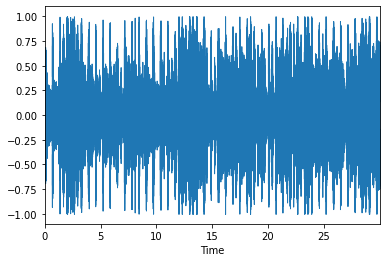

In [5]:
# Waveform plot 하기
import matplotlib.pyplot as plt
import librosa.display
librosa.display.waveplot(audio, sr=sr)
plt.show()

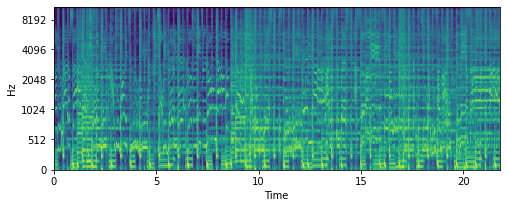

In [6]:
# mel spectrogram plot하기
import numpy as np
mel = librosa.feature.melspectrogram(audio)
plt.figure(figsize=(8,3))
plt.yticks([])
librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis='time', y_axis='mel')
plt.show()


앞서 진행했던 speech mnist 튜토리얼에서 살펴보았던 멜 스펙트로그램보다 더 다양한 신호들이 섞여있는 것을 확인할 수 있습니다.

이전처럼, Pop 장르에 속한 곡들의 멜 스펙트로그램들을 비교해서 공통점이 나타나는지 확인해보겠습니다.



---

제일 첫번째 줄에 있는 genre = 'pop' 을 다른 장르, 예를 들어 genre = 'reggae' 등으로 바꿔서 다른 장르의 특성도 확인해보세요.


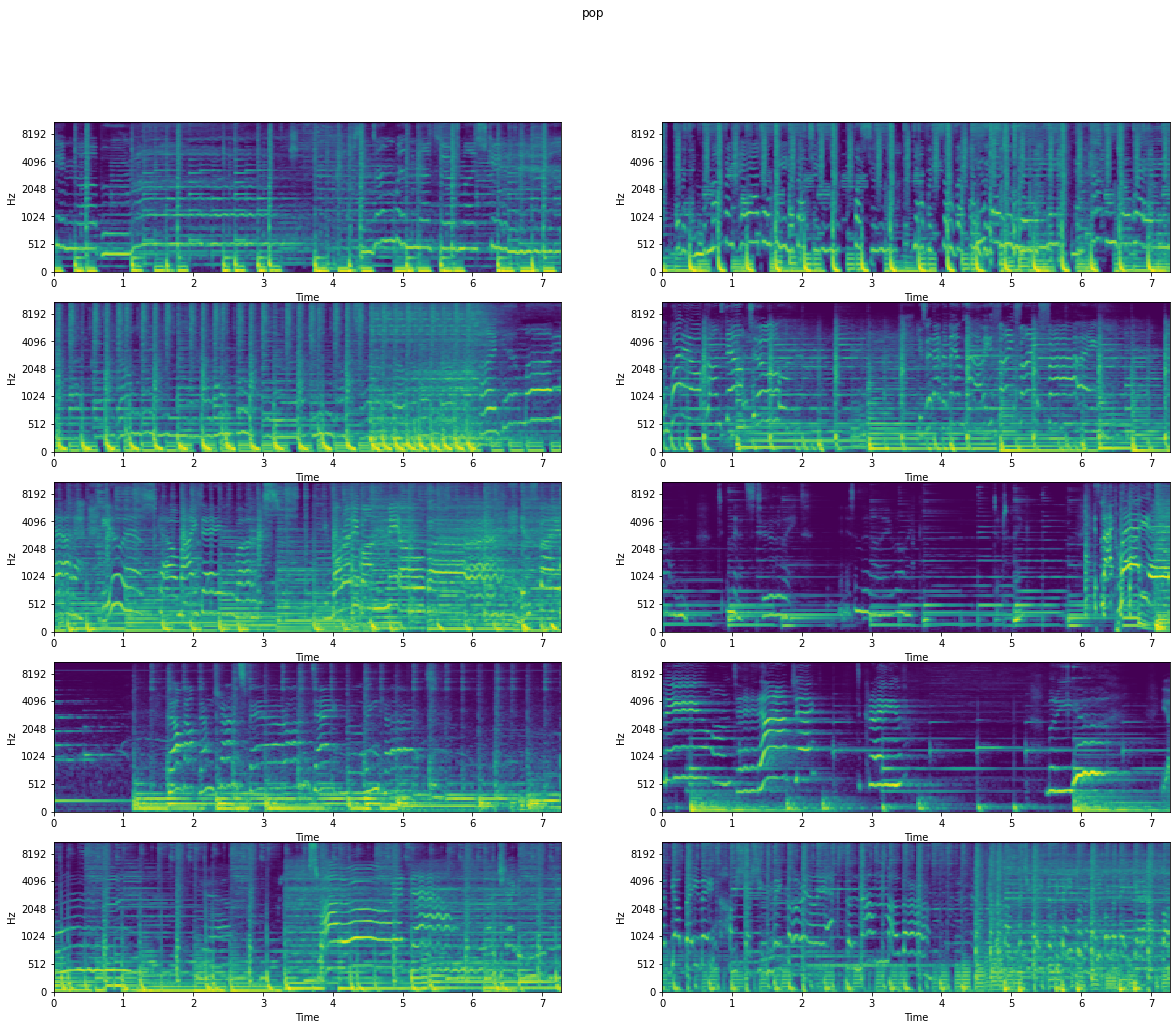

In [7]:
genre = 'pop'

list = []
for i in range(10):
  temp, sr = librosa.load('./tutorial2/wav/{}/{}_0000{}.wav'.format(genre,genre,i), 16000)
  list.append(temp)


plt.figure(figsize=(20,16))
plt.suptitle(genre)
for index, item in enumerate(list):
  mel = librosa.feature.melspectrogram(item[:10*16000])
  plt.subplot(5,2,index+1)
  plt.xticks([])  
  plt.yticks([])
  librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis='time',y_axis='mel')
  


이번엔 장르 간에 어떤 차이가 있는지 확인해볼까요?

10개의 장르에서 한 곡씩을 불러와서 이전과 동일하게 멜 스펙트로그램으로 나타내봅시다.

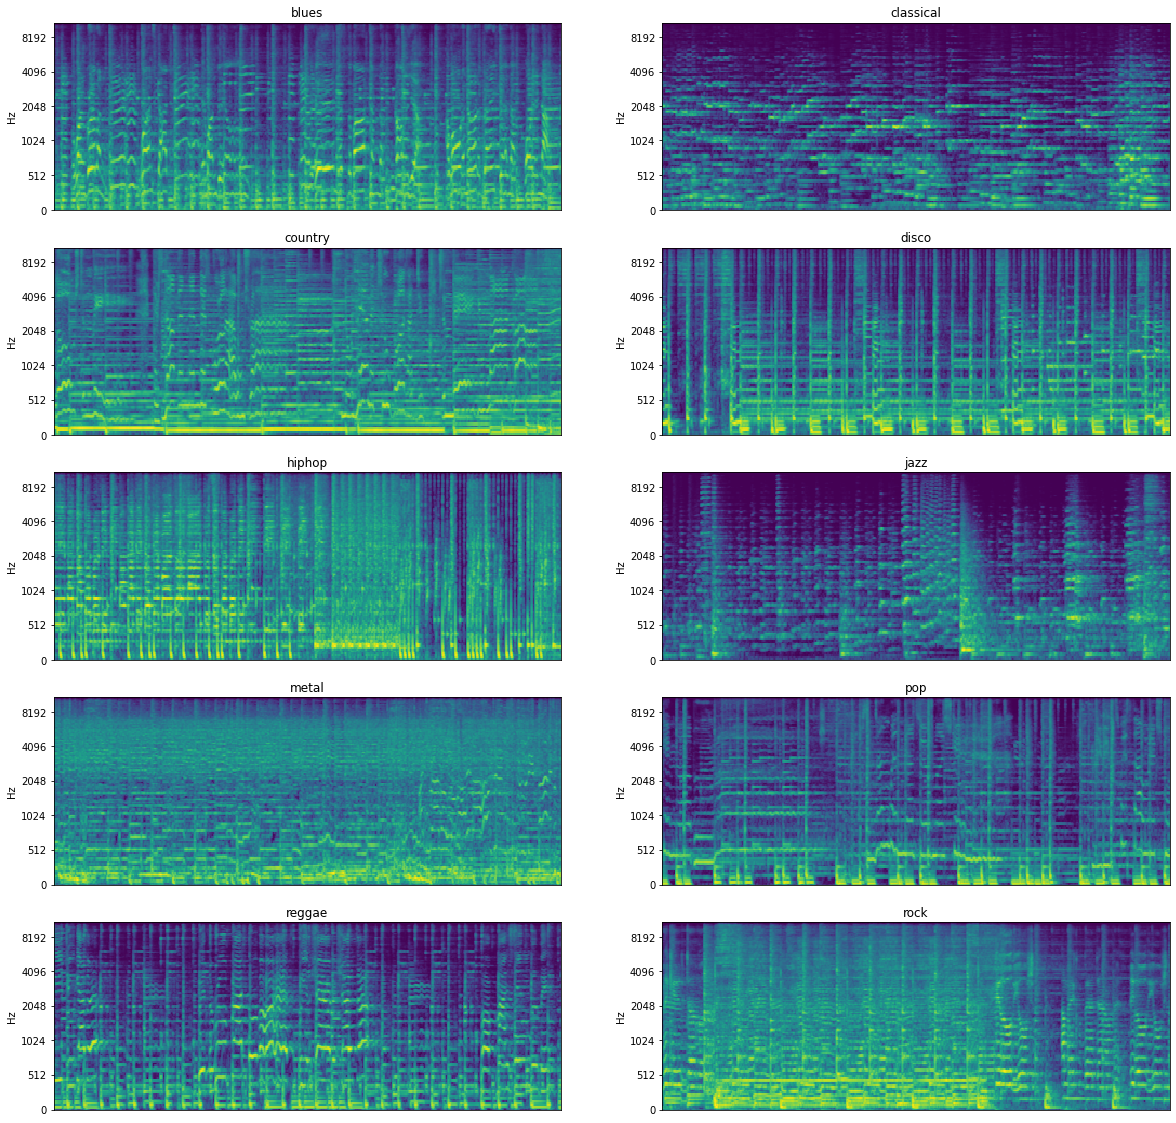

In [8]:
list = []
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
for genre in genres:
  temp, sr = librosa.load('./tutorial2/wav/{}/{}_00000.wav'.format(genre,genre),16000)
  list.append(temp)

plt.figure(figsize=(20,20))
for index, item in enumerate(list):
  mel = librosa.feature.melspectrogram(item[:15*16000])
  plt.subplot(5,2,index+1)
  plt.gca().set_title(genres[index])
  plt.xticks([])
  plt.yticks([])
  librosa.display.specshow(np.log(mel+1e-3),cmap='viridis', x_axis=None,y_axis='mel')

# 학습 데이터 전처리

이제, 학습을 위해 모든 음원 파일을 불러와봅시다. 

In [1]:
import glob
path = './tutorial2/npy/*/*.npy'
audio_files = sorted(glob.glob(path))
len(audio_files)

1000

이제 audio_files라는 리스트가 생성되었고, 그 안에는 모든 음원 파일의 npy 파일 경로가 포함되어 있습니다. 

총 파일 개수는 1000개 입니다. 

이제 이 모든 학습 데이터를 불러오고, 각 파일의 정답 label을 만들어보도록 하겠습니다. 

각 클래스를 정수로 표현하기 위해 각 장르를 genres라는 리스트에 포함되어있는 순서로 정답지를 만듭니다.



---

audio_files에 들어있는 파일명은 './tutorial2/npy/blues/blues_00000.npy' 와 같은 형식을 갖고 있습니다.

여기서 split() 함수는 문자열을 주어진 구분자 단위로 나누어주는 함수입니다. 

따라서 './tutorial2/npy/blues/blues_00000.npy'를 '/' 단위로 나눈다면 가장 마지막 문자열은 'blues_00000.npy'가 됩니다.

또한 index()함수는 주어진 리스트에서 변수로 주어진 레이블이 몇 번째에 위치했는지를 리턴해주는 함수입니다.

blues --> 0, classical --> 1, country --> 2, ...


In [2]:
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

audio_data = []
class_label = []

for item in audio_files:
  audio = np.load(item)
  audio_data.append(audio)
  label = item.split('/')[-1].split('_')[0]
  class_label.append(genres.index(label))

NameError: ignored

이제 audio_data에는 음원 데이터가, class_label에는 class 정보가 담겨있습니다. 

각 데이터가 제대로 담겨있는지 확인하기 위해서 개수를 확인해보겠습니다.

다음은 class_label에 담겨져 있는 데이터의 수를 확인하는 코드입니다.


audio_data에도 같은 수의 파일이 있는지 출력해서 확인해보세요


In [11]:
len(audio_data)

1000

마찬가지로, 모든 오디오의 정답지를 label_all에 저장합니다. 

이 때 one-hot encoding을 사용합니다.

one-hot encoding이란 정답지를 벡터로 변환하는 작업을 뜻합니다.

Ex)

정답지: 0 --> [1,0,0,0,0,0,0,0,0,0]

정답지: 1 --> [0,1,0,0,0,0,0,0,0,0]

정답지: 2 --> [0,0,1,0,0,0,0,0,0,0]

In [12]:
label_all = []
for item in class_label:
	label_all.append(np.eye(10)[item])

In [13]:
len(label_all)

1000

이제 1000곡의 곡과, 정답지를 리스트로 만들었습니다.

학습이 잘 이루어졌는지 확인하기 위한 용도로 곡들을 train set과 test set으로 분리합니다.

전체에서 10%를 test set으로 지정합니다.

따라서 900곡이 train set, 100곡이 test set이 됩니다.

In [14]:
Wav_all = np.asarray(audio_data)
label_all = np.asarray(label_all)
from sklearn.model_selection import train_test_split
Wav_train, Wav_test, label_train, label_test = train_test_split(Wav_all, label_all, test_size=0.1, random_state=123, stratify=label_all)


이제, 학습을 시작하기 전에 곡들을 멜 스펙트로그램으로 변환을 해야합니다.

데이터의 수가 많아 전처리하는데 시간이 오래 걸리는 관계로 설명드린 과정과 동일한 방법으로 전처리한 파일을 따로 'tutorial2/preprocessed_features' 에 저장해두었습니다.

따라서 이 단계는 미리 전처리된 파일을 불러오는 것으로 대신합니다.



---

주석 처리되어 있는 부분이 생략된 과정입니다.


In [15]:
# 마지막 전처리 과정입니다. 시간 관계 상 실행은 생략합니다.
# Wav_all = []
# X_train = []
# y_train = []

# for wav,label in zip(Wav_train, label_train):
#   mel = librosa.feature.melspectrogram(wav,sr=16000,n_fft=512,hop_length=375,n_mels=96)
#   log_mel = np.log(mel+1e-3)
#   X_train.append(np.expand_dims((log_mel),axis=-1))
#   y_train.append(label)

# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

# X_test = []
# y_test = []

# for wav,label in zip(Wav_test, label_test):
#   mel = librosa.feature.melspectrogram(wav,sr=16000,n_fft=512,hop_length=375,n_mels=96)
#   log_mel = np.log(mel+1e-3)
#   X_test.append(np.expand_dims((log_mel),axis=-1))
#   y_test.append(label)

# X_test = np.asarray(X_test)
# y_test = np.asarray(y_test)


X_train = np.load('./tutorial2/preprocessed_features/GTZAN_train_features.npy')
y_train = np.load('./tutorial2/preprocessed_features/GTZAN_train_labels.npy')
X_test = np.load('./tutorial2/preprocessed_features/GTZAN_test_features.npy')
y_test = np.load('./tutorial2/preprocessed_features/GTZAN_test_labels.npy')
print("Train set size", X_train.shape[0])
print("Test set size", X_test.shape[0])

Train set size 900
Test set size 100


#모델 설계

학습 데이터는 모두 준비되었고, 이제 학습을 위한 모델을 설계해보겠습니다.

In [16]:
# 이제 학습 데이터 준비까지 끝났다. 학습을 위해, 모델을 설계해보자. 

from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization,pooling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(BatchNormalization(input_shape=(96,1280,1)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(pooling.MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(pooling.MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.MaxPooling2D(pool_size=(3,3)))

model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))

model.add(pooling.AveragePooling2D(pool_size=(3,3)))

model.add(Flatten())
 
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


이제 모델의 구조 설계는 끝났습니다.

이전 실습과 동일하게 모델의 학습에 사용되는 loss function과 optimizer를 설정해줍니다.

또한 학습 중에 validation accuracy가 가장 높을 때 네트워크의 파라미터를 저장하게 해봅시다.


In [17]:
# 전체 모델은 sequential 하게 conv layer 및 pooling layer, 그리고 dense로 구성되어있다. 
# 이제 해당 모델에 어떤 loss를 줄거고, 어떤 optimizer를 쓸지 정해주자.
opt = Adam(lr=0.0002)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
# Validation accuracy가 가장 높을 때 네트워크를 저장하자.
checkpoint = ModelCheckpoint('best.h5', verbose=0, monitor='val_accuracy',save_best_only=True, mode='auto')

학습을 시작하기 전에 설계한 모델의 정보를 출력해봅니다.

각 층마다 출력 모양, 파라미터 수를 확인할 수 있습니다.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 96, 1280, 1)       4         
_________________________________________________________________
activation (Activation)      (None, 96, 1280, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 1280, 64)      640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 1280, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 96, 1280, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 1280, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 426, 64)       0

#모델 훈련

이제, 학습을 시작합니다.

Epoch은 전체 데이터에 대한 반복 학습 횟수입니다.

학습 도중 각 단계마다 오차(loss)와 정확도(acc)가 출력됩니다.

학습이 진행되는 동안 이 둘이 어떻게 변하는지 확인합니다.

이번에는 validation_data 에 test set을 넣어서 각 에폭마다 테스트 성능이 어떻게 변하는지도 확인할 수 있습니다.


In [ ]:
# 모델과 loss, optimizer가 모두 정해졌으니, 이제 학습을 시켜보자.
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=32, epochs=20, verbose=1, callbacks=[checkpoint])

Epoch 1/20


# 모델 평가 및 결과 분석

이제 학습이 완료되었습니다.

미리 나눠둔 test set을 이용해 실제 성능을 확인해봅니다.

In [ ]:
# 학습된 모델에, test set을 넣어서 실제 성능을 확인해보자.
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", score[1])

이번에는 학습 중에 validation accuracy가 가장 높았을 때의 파라미터를 불러와서 성능을 확인해보겠습니다.



In [ ]:
model = load_model('best.h5')
score = model.evaluate(X_test, y_test, verbose=0)
print("Best Model Test Accuracy:", score[1])

테스트 결과를 바탕으로 confusion matrix를 그려봅니다.

Confusion matrix는 실제 정답과 예측한 정답 사이의 관계를 나타낸 표입니다.


In [ ]:
# confusion matrix를 그려보자.
# 즉, test set에 있는 입력들에 대해, 실제 정답과 예측한 정답 사이의 관계를 나타낸 표를 그려보자.
from sklearn.metrics import classification_report, confusion_matrix
import itertools
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
y_gt = np.argmax(y_test, axis=1)

plt.figure(figsize=(8,8))
cm = confusion_matrix(y_gt, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'], rotation=45)
plt.yticks(tick_marks, ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock'])
thresh = cm.max()/2.
normalize = False
fmt = '.2f' if normalize else 'd'
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, format(cm[i,j], fmt), horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()


다음은 우리의 모델이 입력 데이터를 어떤 식으로 맵핑하는지를 확인하기 위한 방법을 다룹니다.

같은 class의 데이터에 대해 서로 유사한 값을 갖는지 확인하기 위해 입력 데이터에 대해 중간 layer에서  처리한 feature를 가져옵니다. 

In [ ]:
# 실제로 중간에 얻어진 feature가 같은 class에 대해서 서로 유사한 값을 갖는지 확인하기 위해, 고차원 데이터를 2차원 데이터로 맵핑하는 TSNE 예시를 보자.
# 우선, 우리가 설계한 모델에서 모든 레이어의 출력을 확인할 수 있는 코드를 작성하자.

model_embedding = Model(inputs=[model.input], outputs=[model.layers[-3].output])
temp = model_embedding.predict(X_train)

이제 우리는 훈련 데이터에 대해 모델이 128차원으로 축소한 feature를 얻었습니다.

이를 시각화하기 위해 T-SNE를 적용합니다. T-SNE는 고차원 공간상에서의 거리를  낮은 차원에서도 가깝게 유지하도록하는 차원 축소 방법입니다.

따라서 앞서 얻어진 128차원의 벡터들을 2차원 평면으로 축소시켜 시각화에 용이하도록 바꿔줍니다.

In [ ]:
# 해당 출력값 temp에 대해, TSNE를 적용하자.
# 즉, 128차원 벡터들을, 2차원 평면으로 차원 축소를 한다. 이 때, 128차원 공간상에서 가깝던 것들이 2차원에서도 여전히 가깝게 유지되도록 기준을 정한채 차원을 축소한다. 

from sklearn.manifold import TSNE
X = temp

X_embedded = TSNE(n_components=2,random_state=100).fit_transform(X)

2차원으로 축소한 데이터를 각 class에 따라 색을 다르게 표현하여 그래프에 표시합니다.

이를 통해 같은 class끼리 잘 뭉쳐있는지 확인을 할 수 있습니다.

In [ ]:
# 그리고 나서, 각 벡터들을 2차원 평면상에 클래스에 따라 그려보면 다음과 같다. 

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
numbers = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

plt.figure(figsize=(10,10))
plt.clf()
y_gt = np.argmax(y_train,axis=1)
for i in range(10):
	index = np.where(y_gt==i)[0]
	plt.scatter(X_embedded[index][:,0], X_embedded[index][:,1], c = colors[i], label=numbers[i])


plt.legend(bbox_to_anchor=(1,0.88))
plt.show()

다음은 훈련 중 loss와 accuracy가 어떻게 변했는지를 그래프로 나타내보겠습니다.

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b-', label="t")
plt.plot(hist.history['val_loss'], 'r:', label="v")
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.title("accuracy")

plt.plot(hist.history['accuracy'], 'b-', label="t")
plt.plot(hist.history['val_accuracy'], 'r:', label="v")
plt.legend()
plt.tight_layout()
plt.show()